In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Importing image data into Numpy arrays

In [3]:
img = mpimg.imread('/Users/andreasoggia/code/asoggia/tails-and-whales/raw_data/andrea_data_tails-and-whales/subset_3_train/000a8f2d5c316a.jpg')
img.shape

(2304, 3456, 3)

In [4]:
type(img)

numpy.ndarray

### Plotting Numpy arrays as images

<class 'matplotlib.image.AxesImage'>


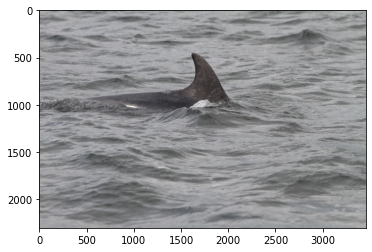

In [5]:
imgplot = plt.imshow(img, cmap='gray')
print(type(imgplot))

### Loading multiple images from a local directory

In [6]:
#!/usr/bin/python
from os import listdir

In [7]:
path = "/Users/andreasoggia/code/asoggia/tails-and-whales/raw_data/andrea_data_tails-and-whales/subset_3_train/"
images_list = listdir(path)
loaded_images = []

for image in images_list:
    img = mpimg.imread(path + image)
    loaded_images.append(img)

type(loaded_images)

list

In [8]:
type(loaded_images[0])

numpy.ndarray

In [9]:
loaded_images[0].shape

(178, 700, 3)

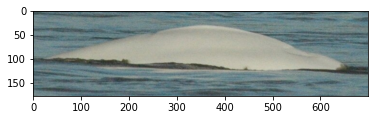

In [10]:
plt.imshow(loaded_images[0], cmap='gray')

In [11]:
X = np.asarray(loaded_images)

/var/folders/rw/z5rxgs8n5rq3xzxhn20lxbrr0000gn/T/ipykernel_29600/2680876176.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(loaded_images)


In [12]:
type(X)

numpy.ndarray

In [13]:
X.shape

(3,)

In [22]:
X[0].shape

(178, 700, 3)

In [23]:
X[1].shape

(2304, 3456, 3)

In [24]:
X[2].shape

(2400, 3600, 3)

In [14]:
# Warning message as X is composed of ndarray with different shape!! 

### Metadata extraction from image dataset

In [15]:
height = []
length = []
channels = []
for img in loaded_images:
    height.append(img.shape[0])
    length.append(img.shape[1])
    channels.append(img.shape[2])

In [16]:
print(f'height: {height}')
print(f'length: {length}')
print(f'channels: {channels}')

height: [178, 2304, 2400]
length: [700, 3456, 3600]
channels: [3, 3, 3]


### Creating pd.DataFrame

In [17]:
import pandas as pd
print(pd.__version__)

1.4.2


In [18]:
data = {'img': images_list, 'height': height, 'length': length, 'channels': channels}
df = pd.DataFrame.from_dict(data)
df

,img,height,length,channels
0,000be9acf46619.jpg,178,700,3
1,000a8f2d5c316a.jpg,2304,3456,3
2,000bef247c7a42.jpg,2400,3600,3


### Plotting image size (scatterplot)

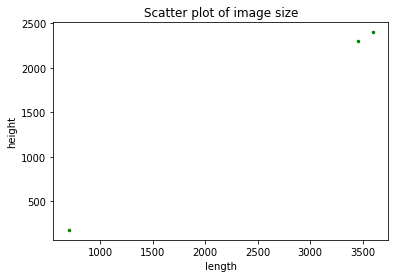

In [19]:
# Create data
length = df['length']
height = df['height']
area = np.pi*2

# Plot
plt.scatter(length, height, s=area, color= 'green')
plt.title('Scatter plot of image size')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

### Plotting image size (histplot)

### How many channels: 1 or 3?

In [20]:
df.channels.value_counts()

3    3
Name: channels, dtype: int64

### Resizing the images